# **Project Title:** 
## Exams Schedule Generator Using Genetic Algorithm


## **Course:**  
### Artificial Intelligence




### **1. Handling and Reading CSV Files**

* **Importing Modules**: 
  1. Pandas
  2. Random
  3. Numpy
  
* **Reading CSV Files**:
  1. Courses (courses.csv)
  2. Students Names with 
  Enrolled Courses (studentCourse.csv)
  3. Names of Students (studentNames.csv)
  4. Name of Teachers (teachers.csv)


In [1]:
import pandas as pd
import random
import numpy as np
courses = pd.read_csv('courses.csv')
students_courses = pd.read_csv('studentCourse.csv')
students_name = pd.read_csv('studentNames.csv')
teachers_name = pd.read_csv('teachers.csv')

students_courses


,Student Name,Course Code
0,Sam D Edwards,AI2011
1,Sheila Hughton,DS3011
2,Yasmin Ahmed,SE110
3,Sarah N Md Sallehuddin Khan,EE229
4,Sarah Nolasco,AI2011
...,...,...
294,Sarah Hadley,MG223
295,Sam Dalgleish,MT205
296,Zahra Faraji Rad,CS118
297,Natasha Tait,CS211



### **2. Generating an Initial Population**

In this section, we initialize the population of potential solutions (chromosomes) for the Genetic Algorithm. 

1. **Loading Data**: We load data from CSV files containing information about courses, students, and teachers.

2. **Defining Parameters**: We define parameters such as available classrooms, weekdays, and a function to generate a random schedule.

3. **Generating Schedules**: Random schedules are generated for each course, adhering to constraints like teacher availability, classroom allocation, and student enrollment.

4. **Population Size**: The number of schedules in the initial population is specified, and a list of schedules is generated accordingly.

The generated schedules serve as the starting point for the Genetic Algorithm, allowing for further optimization through evolutionary processes.


In [2]:
# Load data from CSV files
courses = pd.read_csv('courses.csv')
students_courses = pd.read_csv('studentCourse.csv')
teachers_names = pd.read_csv('teachers.csv')

# Extract unique student names from the studentCourse.csv file
students_names = students_courses['Student Name'].unique()

# Define available classrooms
classrooms_range = {
    'C': list(range(301, 311)),
    'B': list(range(101, 111)) + list(range(200, 211)),
    'A': list(range(101, 111)) + list(range(201, 211)) + list(range(300, 312))
}


weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']

# Define a function to generate a random schedule (chromosome)
def generate_random_schedule(courses, teachers, students, classrooms_range):
    schedule = []
    for index, course in courses.iterrows():
        # Randomly select a teacher for the exam
        teacher = random.choice(teachers['Names'].tolist())
        # Randomly select a classroom for the exam
        classroom_type = random.choice(list(classrooms_range.keys()))
        classroom_number = random.choice(classrooms_range[classroom_type])
        classroom = f"{classroom_type}{classroom_number}"
        # Set exam duration to 1 hour
        duration = 1
        # Randomly select a starting time for the exam (between 9 am and 5 pm)
        start_time = random.randint(9, 16)
        # Get a random subset of students enrolled in the course
        num_students_available = len(students)
        num_students_to_sample = max(1, random.randint(1, num_students_available))
        enrolled_students = random.sample(list(students), num_students_to_sample)
        # Randomly select a day for the exam
        day = random.choice(weekdays)
        # Construct the exam information as a dictionary
        exam_info = {
            'courseCode': course['Course Code'],
            'duration': duration,
            'classroom': classroom,
            'startTime': start_time,
            'teacher': teacher,
            'students': enrolled_students,
            'day': day
        }
        # Append the exam information to the schedule
        schedule.append(exam_info)
    return schedule

# Define the population size (number of schedules/chromosomes)
population_size = 20
# Generate an initial population of schedules
initial_population = [generate_random_schedule(courses, teachers_names, students_names, classrooms_range) for _ in range(population_size)]

# Convert the first schedule into a DataFrame
schedule_df = pd.DataFrame(initial_population[0])

# Display the DataFrame
schedule_df

,courseCode,duration,classroom,startTime,teacher,students,day
0,CS217,1,A206,14,Waqas Munir,"[Ahmad F Yang Abd Talib, Mohammed Z Albahar, S...",Monday
1,EE227,1,B206,9,Shafaq Riaz,"[Hamza Bin Muhammad, Adam Kirk, Ahmed Ahmed, S...",Friday
2,CS211,1,A101,15,Khadija Farooq,"[Arooba Zahoor, Zainab Khattak, Natasha Leeson...",Friday
3,SE110,1,C301,13,Bilal Khalid,"[Dalia Remeikyte, Ahmed Ahmed, Sarah Wilson, Y...",Friday
4,CS118,1,B210,15,Faisal Cheema,"[Dalia Remeikyte, Sara Zamberlan, Ann Wilson, ...",Tuesday
5,CS219,1,A206,16,Tayyab Nadeem,"[Imtiaz Kermali, Maria Lytras, Sarah E Kirkham...",Thursday
6,CS220,1,B206,12,Shoaib Mehboob,"[Huda O Ali, Usman Rafiq, Shahzada S Niwaz, Ma...",Thursday
7,CS302,1,A301,11,Usman Rashid,"[Halima Sayed, Ayan Lowe, Mohammad Abir]",Thursday
8,CY2012,1,B202,10,Amna Irum,"[Babak Cheraghchi Bashi Astaneh, Sarah French,...",Thursday
9,CS307,1,A311,13,Hassan Mustafa,"[Negar Saleh, Halima Sayed, Lilia Kyuchukova, ...",Wednesday


### **3. Implementation of Hard Constraints**

1. **Course Scheduling**: Ensure that an exam is scheduled for each course.
   
2. **No Weekend Exams**: Exams should not be scheduled on Saturdays or Sundays.
   
3. **Exam Time**: Exams must be scheduled between 9 am and 5 pm.
   
4. **Teacher Schedule Repeated**: Teachers cannot invigilate two exams at the same time or two exams in a row.
   
5. **No Consecutive Exams for Teachers**: Teachers should not invigilate two exams in a row.
   
6. **No Student Concurrent Exams**: Students cannot give more than one exam at the same time.A student should be Enrolled in 3 Courses


In [3]:
import pandas as pd
import random



def test_course_scheduling(courses, schedule_df):
    # Extract unique course codes from the 'courseCode' column of the 'courses' dataframe
    course_codes = set(courses['Course Code'])
    # Extract unique course codes from the 'courseCode' column of the 'schedule_df' dataframe
    scheduled_courses = set(schedule_df['courseCode'])
    # Check if the set of scheduled courses matches the set of all courses
    return scheduled_courses == course_codes
# Example usage:
correct = test_course_scheduling(courses, schedule_df)
print(correct)



def test_no_weekend_exams(schedule_df):

    scheduled_courses = set(schedule_df['day']) 
    if scheduled_courses in ['Saturday', 'Sunday']:
            return False
    return True
# Example usage:
c1 = test_no_weekend_exams(schedule_df)
print(c1)



def test_exam_time(schedule_df):
    for index, exam in schedule_df.iterrows():
        start_time = exam['startTime']
        if start_time < 9 or start_time >= 17:
            return False
    return True

# Example usage:
c2 = test_exam_time(schedule_df)
print(c2)




def test_teacher_schedule_repeated(schedule_df):
    # Create a unique identifier for each exam based on teacher, day, and start time
    schedule_df['unique_identifier'] = schedule_df['teacher'] + '_' + schedule_df['day'] + '_' + schedule_df['startTime'].astype(str)
    # Check for duplicates in the unique identifiers
    duplicates = schedule_df['unique_identifier'].duplicated()
    # If any duplicates are found, return False
    if duplicates.any():
        return False
    # If no duplicates are found, return True
    return True


# Example usage:
c4 = test_teacher_schedule_repeated(schedule_df)
print(c4)



def test_no_consecutive_exams(schedule):
    teacher_previous_end_time = {}
    
    for index, exam in schedule.iterrows():
        teacher = exam['teacher']
        start_time = exam['startTime']
        end_time = start_time + exam['duration']
        
        # Check if the teacher is invigilating two exams in a row
        if teacher in teacher_previous_end_time:
            if start_time == teacher_previous_end_time[teacher]:
                return False
        
        # Update the end time of the current exam as the previous end time for the teacher
        teacher_previous_end_time[teacher] = end_time
    
    # If no consecutive exams for any teacher, return True
    return True
            

c5 = test_no_consecutive_exams(schedule_df)
print(c5)

def test_no_student_concurrent_exams(schedule):
    # Initialize a dictionary to track time slots occupied by exams for each student
    student_exams = {}
    
    # Iterate over each row in the schedule
    for index, exam in schedule.iterrows():
        start_time = exam['startTime']
        end_time = start_time + exam['duration']
        day = exam['day']
        
        # Check each student enrolled in the exam
        for student in exam['students']:
            # Check if the student is already scheduled for another exam at the same time
            if student in student_exams:
                for slot in range(start_time, end_time):
                    if (day, slot) in student_exams[student]:
                        # If so, the student is giving more than one exam at the same time
                        return False
            else:
                student_exams[student] = set()
            
            # Update the time slots occupied by exams for the current student
            for slot in range(start_time, end_time):
                student_exams[student].add((day, slot))
    
    # If no student is giving more than one exam at the same time, return True
    return True

    
c6 = test_no_consecutive_exams(schedule_df)
print(c6)

True
True
True
False
False
False


### **4. Implementation Of Soft Constraints**


1. **Exam Break Time**: Ensure no exams are scheduled on Friday from 1 to 2.
   
2. **No Consecutive Exams for Students**: Ensure students do not have consecutive exams on the same day.
   
3. **Preference for MG Before CS**: Prefer scheduling Management (MG) course exams before Computer Science (CS) course exams for students enrolled in both.
   
4. **Faculty Break Time**: Determine two days with the fewest exams and find the earliest start time on each of those days for faculty break scheduling.


In [5]:
def schedule_exam_break(schedule):
    # Check if any exam is scheduled on Friday from 1 to 2
    for index, exam in schedule.iterrows():
        if exam['day'] == 'Friday' and exam['startTime'] >= 13 and exam['startTime'] < 14:
            # If an exam is found during the break time, return False
            return False
    # If no exam is scheduled during the break time, return True
    return True
test_case_7 = test_no_consecutive_exams(schedule_df)
print(test_case_7)

def test_no_consecutive_exams_for_student(schedule):
    # Initialize a dictionary to track the last exam day for each student
    student_last_exam_day = {}

    # Iterate over each row in the schedule
    for index, exam in schedule.iterrows():
        day = exam['day']
        # Check each student enrolled in the exam
        for student in exam['students']:
            # Check if the student has a previous exam
            if student in student_last_exam_day:
                # Check if the previous exam was on the same day
                if day == student_last_exam_day[student]:
                    # If the student has consecutive exams on the same day, return False
                    return False
            # Update the last exam day for the current student
            student_last_exam_day[student] = day

    # If no student has consecutive exams on the same day, return True
    return True
test_case_8 = test_no_consecutive_exams_for_student(schedule_df)

print(test_case_8)
def prefer_mg_before_cs(schedule):
    # Iterate over each row in the schedule
    for index, exam in schedule.iterrows():
        students = exam['students']
        mg_student = any('MG' in student for student in students)
        cs_student = any('CS' in student for student in students)
        # Check if the student is enrolled in both MG and CS courses
        if mg_student and cs_student:
            mg_exam = 'MG' in exam['courseCode']
            cs_exam = 'CS' in exam['courseCode']
            # Ensure MG course exams are scheduled before CS course exams
            if cs_exam and not mg_exam:
                return False
    return True

# Example usage:
test_case_9 = prefer_mg_before_cs(schedule_df)
print(test_case_9)

def faculty_break_time(schedule):
    # Initialize a dictionary to count the number of exams per day
    exams_per_day = {}
    # Initialize a dictionary to store the start times of exams for each day
    start_times_per_day = {}
    
    # Iterate over each row in the schedule
    for index, exam in schedule.iterrows():
        day = exam['day']
        # Increment the count of exams for the current day
        exams_per_day[day] = exams_per_day.get(day, 0) + 1
        # Store the start time of the exam for the current day
        if day not in start_times_per_day:
            start_times_per_day[day] = [exam['startTime']]
        else:
            start_times_per_day[day].append(exam['startTime'])
    
    # Find the two days with the fewest exams
    min_days = sorted(exams_per_day, key=exams_per_day.get)[:2]
    
    # Find the earliest start time on each of the break days
    break_times = {}
    for day in min_days:
        break_times[day] = min(start_times_per_day[day])
    
    return break_times

# Example usage:
break_times = faculty_break_time(schedule_df)
print("Break Times:", break_times)

False
False
True
Break Times: {'Tuesday': 13, 'Monday': 10}


### **5. Calculation of Fitness Value**

In this section, the fitness value of each schedule (chromosome) is calculated based on both hard and soft constraints. 

1. **Hard Constraints Fulfillment**: 
   - Several hard constraints are evaluated, including course scheduling, weekend exams, exam time range, teacher schedule repetitions, consecutive exams for teachers, and concurrent exams for students. Each violated hard constraint decreases the fitness score by 10.

2. **Soft Constraints Fulfillment**:
   - Various soft constraints are considered, such as breaks on Friday from 1-2, no consecutive exams for any student, preference for MG course exams before CS course exams, and faculty break time optimization. Satisfying each soft constraint increases the fitness score by 5, with additional points awarded for optimizing faculty break times.

The fitness score, along with any violated constraints and satisfied soft constraints, is calculated for each schedule in the initial population, providing a basis for evaluating and selecting potential solutions in the Genetic Algorithm.
The fitness score, violated constraints, and satisfied soft constraints are determined for each schedule in the initial population, facilitating further evaluation and optimization in the Genetic Algorithm.


In [6]:
def calculate_fitness(schedule):
    # Initialize fitness score
    fitness_score = 0
    
    # Initialize lists to store violated constraints and satisfied soft constraints
    violated_constraints = []
    satisfied_soft_constraints = []
    
    # Hard Constraints
    
    # 1. An exam will be scheduled for each course
    if not test_course_scheduling(courses, schedule):
        violated_constraints.append("An exam is not scheduled for each course")
        # Decrease fitness score for violating this hard constraint
        fitness_score -= 10
    
    # 2. No weekend exams
    if not test_no_weekend_exams(schedule):
        violated_constraints.append("Exams are scheduled on Saturday or Sunday")
        fitness_score -= 10
    
    # 3. Exam time within allowed range (9 am to 5 pm)
    if not test_exam_time(schedule):
        violated_constraints.append("Exam is scheduled outside of the allowed time range")
        fitness_score -= 10
    
    # 4. Teacher does not invigilate two exams in a row
    if not test_teacher_schedule_repeated(schedule):
        violated_constraints.append("A teacher invigilates two exams in a row")
        fitness_score -= 10
    
    # 5. No consecutive exams for any teacher
    if not test_no_consecutive_exams(schedule):
        violated_constraints.append("A teacher invigilates two consecutive exams")
        fitness_score -= 10
    
    # 6. No student gives more than one exam at the same time
    if not test_no_student_concurrent_exams(schedule):
        violated_constraints.append("A student is giving more than one exam at the same time")
        fitness_score -= 10
    
    # Soft Constraints
    
    # 1. Break on Friday from 1-2
    if schedule_exam_break(schedule):
        satisfied_soft_constraints.append("Break on Friday from 1-2")
        # Increase fitness score for satisfying this soft constraint
        fitness_score += 5
    
    # 2. No consecutive exams for any student
    if test_no_consecutive_exams_for_student(schedule):
        satisfied_soft_constraints.append("No consecutive exams for any student")
        fitness_score += 5
    
    # 3. Prefer MG course exams before CS course exams
    if prefer_mg_before_cs(schedule):
        satisfied_soft_constraints.append("Prefer MG course exams before CS course exams")
        fitness_score += 5
    
    # 4. Faculty break time optimization
    faculty_break_times = faculty_break_time(schedule)
    if faculty_break_times:
        satisfied_soft_constraints.append("Faculty break time optimization")
        # Increase fitness score for satisfying this soft constraint based on the number of break times found
        fitness_score += len(faculty_break_times) * 5
    
    return fitness_score, violated_constraints, satisfied_soft_constraints

population_df = [pd.DataFrame(schedule) for schedule in initial_population]

fitness_scores_and_constraints = [calculate_fitness(schedule_df) for schedule_df in population_df]

# Display the fitness scores, violated constraints, and satisfied soft constraints for each schedule
for i, (score, constraints, satisfied_constraints) in enumerate(fitness_scores_and_constraints):
    if score == 0:
        print(f"Fitness Score for Schedule {i+1}: {score}, Violated Constraints: {', '.join(constraints)}")
    else:
        print(f"Fitness Score for Schedule {i+1}: {score}, Satisfied Soft Constraints: {', '.join(satisfied_constraints)}")

Fitness Score for Schedule 1: -15, Satisfied Soft Constraints: Prefer MG course exams before CS course exams, Faculty break time optimization
Fitness Score for Schedule 2: 10, Satisfied Soft Constraints: Break on Friday from 1-2, Prefer MG course exams before CS course exams, Faculty break time optimization
Fitness Score for Schedule 3: 10, Satisfied Soft Constraints: Break on Friday from 1-2, Prefer MG course exams before CS course exams, Faculty break time optimization
Fitness Score for Schedule 4: 5, Satisfied Soft Constraints: Prefer MG course exams before CS course exams, Faculty break time optimization
Fitness Score for Schedule 5: 10, Satisfied Soft Constraints: Break on Friday from 1-2, Prefer MG course exams before CS course exams, Faculty break time optimization
Fitness Score for Schedule 6: 10, Satisfied Soft Constraints: Break on Friday from 1-2, Prefer MG course exams before CS course exams, Faculty break time optimization
Fitness Score for Schedule 7: 10, Satisfied Soft C

In [24]:
data_new

,courseCode,duration,classroom,startTime,teacher,students,day
0,CS217,1,C305,12,Farah Naz,"[Sarah J Bradford, Faraj B Shaban, Iram Meharb...",Tuesday
1,EE227,1,C309,15,Waqas Munir,"[Arman N Bahadori, Adam Green, Arooba Zahoor, ...",Wednesday
2,CS211,1,A311,12,Umair Arshad,"[Adam L Finch, Zahir Hussain, Maria A Grenfell...",Wednesday
3,SE110,1,B209,15,Sumera Abbas,"[Farzana Yamin, Ayman Jaheen, Arman N Bahadori...",Wednesday
4,CS118,1,B104,16,Noor ul Ain,"[Razan Z Haji Zulkifli, Sarah J Roberts, Kamal...",Monday
5,CS219,1,C305,14,Shoaib Mehboob,"[Soha Siahpoosh Kolyaei, Adam Kirk, Faris Quai...",Friday
6,CS220,1,B109,14,Farwa Batool,"[Adam Green, Jenna Riley, Sheila Hughton, Arsh...",Wednesday
7,CS302,1,B208,13,Muhammad bin Qasim,"[Samina Akbar, Judi Glen, Mohammed Sukkari, Ya...",Wednesday
8,CY2012,1,B207,10,Ameen Chilwan,"[Babak Cheraghchi Bashi Astaneh, Damian A Cumm...",Friday
9,CS307,1,A300,15,Shoaib Mehboob,"[Imtiaz Kermali, Sadra Keyhani, Sarah L Barber...",Tuesday


In [23]:
data_new = pd.DataFrame(initial_population[10])
data_new['students']

0     [Sarah J Bradford, Faraj B Shaban, Iram Meharb...
1     [Arman N Bahadori, Adam Green, Arooba Zahoor, ...
2     [Adam L Finch, Zahir Hussain, Maria A Grenfell...
3     [Farzana Yamin, Ayman Jaheen, Arman N Bahadori...
4     [Razan Z Haji Zulkifli, Sarah J Roberts, Kamal...
5     [Soha Siahpoosh Kolyaei, Adam Kirk, Faris Quai...
6     [Adam Green, Jenna Riley, Sheila Hughton, Arsh...
7     [Samina Akbar, Judi Glen, Mohammed Sukkari, Ya...
8     [Babak Cheraghchi Bashi Astaneh, Damian A Cumm...
9     [Imtiaz Kermali, Sadra Keyhani, Sarah L Barber...
10    [Hazimah H Hj Hamzah, Kabir A Khan, Sarah Fogg...
11    [Parastoo Jamshidi, Zeenat K Guness-Goolbar, Z...
12    [Maryam Askari Louyeh, Adam N Starling, Sarah ...
13    [Sarah Clements, Naseem Akram, Sam Duncanson, ...
14    [Syed M Abbas, Adam N Starling, Sagar R Jilka,...
15    [Ana Sbert Ortin, Sarah Nolasco, Muna Osman, H...
16    [Salwa S Alobaid, Sam J Pottier, Sarah J Rober...
17    [Ramesh R Singh, Shahzada S Niwaz, Imtiaz 

### **6. Roulette Wheel Selection**

#### *Overview:*

This section describes the process of roulette wheel selection, a method used to select potential parents for recombination in the Genetic Algorithm.

#### Methodology

1. **Total Fitness Calculation**:
   - Calculate the total fitness score of the population.

2. **Relative Fitness Calculation**:
   - Calculate the relative fitness for each schedule by dividing its fitness score by the total fitness.

3. **Cumulative Probabilities Calculation**:
   - Calculate cumulative probabilities by summing up the relative fitness values.

4. **Selection Process**:
   - Repeat the selection process twice to choose two parents:
     - Generate a random number between 0 and 1.
     - Find the index of the selected parent using the cumulative probabilities.

### Result
Two parents are selected using the roulette wheel selection method based on their fitness scores and relative probabilities.


In [64]:
def roulette_wheel_selection(population, fitness_scores):
    # Calculate total fitness score
    total_fitness = sum(fitness_scores)
    # Calculate relative fitness for each schedule
    relative_fitness = [score / total_fitness for score in fitness_scores]
    # Calculate cumulative probabilities
    cumulative_probabilities = [sum(relative_fitness[:i+1]) for i in range(len(relative_fitness))]
    
    # Select two parents using roulette wheel selection
    parents = []
    for _ in range(2):
        # Generate a random number between 0 and 1
        r = random.random()
        # Find the index of the selected parent
        for i, prob in enumerate(cumulative_probabilities):
            if r <= prob:
                parents.append(population[i])
                break
    
    return parents



### **7. Crossover**
#### *Overview:*
This section describes the crossover process, which involves combining genetic material from two parent schedules to create offspring in the Genetic Algorithm.

#### Crossover Method Used
The method used for crossover is the **Single-Point Crossover**.

#### Methodology
1. **Random Crossover Point Selection**:
   - Choose a random crossover point between 1 and the minimum length of the two parent schedules.
2. **Offspring Generation**:
   - Create two offspring by combining genetic material from the parents:
     - Offspring 1: Genetic material from parent 1 up to the crossover point and from parent 2 beyond the crossover point.
     - Offspring 2: Genetic material from parent 2 up to the crossover point and from parent 1 beyond the crossover point.

#### Result
Two offspring are generated using the single-point crossover method.


In [63]:
def crossover(parent1, parent2):
    # Choose a random crossover point
    crossover_point = random.randint(1, min(len(parent1), len(parent2)) - 1)
    # Create offspring by combining genetic material from parents
    offspring1 = parent1[:crossover_point] + parent2[crossover_point:]
    offspring2 = parent2[:crossover_point] + parent1[crossover_point:]
    return offspring1, offspring2

### **8. Mutation**

#### Overview

This section outlines the mutation process, which introduces random changes to a schedule in the Genetic Algorithm.

#### Methodology

1. **Random Index Selection**:
   - Choose a random index in the schedule to mutate.

2. **Mutation Application**:
   - Mutate the schedule at the chosen index by applying a specific mutation operation, such as swapping the positions of two exams.

### Result
A mutated schedule is generated, introducing random changes to the original schedule.


In [62]:
def mutation(schedule):
    # Choose a random index to mutate
    index_to_mutate = random.randint(0, len(schedule) - 1)
    # Mutate the schedule at the chosen index
    mutated_schedule = schedule.copy()
    # Apply mutation (e.g., swap two exams)
    # Example mutation: Swap the positions of two randomly chosen exams
    i, j = random.sample(range(len(mutated_schedule)), 2)
    mutated_schedule[i], mutated_schedule[j] = mutated_schedule[j], mutated_schedule[i]
    return mutated_schedule


### **9. Genetic Algorithm Implementation**

This section outlines the implementation of the Genetic Algorithm.

#### Methodology

1. **Iterations**:
   - Set the number of iterations for the genetic algorithm.

2. **Genetic Algorithm Iterations**:
   - Perform the genetic algorithm iterations for the specified number of times.
   
3. **Fitness Evaluation**:
   - Calculate fitness scores for each schedule in the population based on hard and soft constraints.
   
4. **Selection**:
   - Use roulette wheel selection to choose the best schedules based on their fitness values.
   
5. **Crossover**:
   - Apply crossover to generate offspring from the selected parent schedules.
   
6. **Mutation**:
   - Optionally, apply mutation to introduce diversity into the population.
   
7. **Population Update**:
   - Update the population with the offspring and trim it to its original size if necessary.
   
8. **Result Display**:
   - Display fitness scores and violated constraints for the best schedules after each iteration.

### Result
The Genetic Algorithm iterates through a process of selection, crossover, and mutation to evolve potential solutions (schedules) that satisfy both hard and soft constraints.


In [61]:
# Number of iterations for the genetic algorithm
num_iterations = 5

# Perform genetic algorithm iterations
for iteration in range(num_iterations):
    # Calculate fitness scores for each schedule in the population
    fitness_scores_and_constraints = [calculate_fitness(schedule_df) for schedule_df in population_df]
    fitness_scores = [score for score, _, _ in fitness_scores_and_constraints]

    # Perform roulette wheel selection to choose the best schedules based on their fitness values
    selected_schedules = []
    for _ in range(3):
        selected_schedules.append(roulette_wheel_selection(population_df, fitness_scores))

    # Apply crossover to generate offspring from the selected parent schedules
    offspring = []
    for i in range(0, len(selected_schedules) - 1, 2):
        offspring1, offspring2 = crossover(selected_schedules[i], selected_schedules[i+1])
        offspring.append(offspring1)
        offspring.append(offspring2)

    # Optionally, apply mutation to introduce diversity into the population
    mutated_offspring = [mutation(schedule) for schedule in offspring]

    # Update the population with the offspring
    population_df.extend(mutated_offspring)

    # Trim the population to its original size (if necessary)
    population_df = population_df[:population_size]

    # Display fitness scores and violated constraints for the best schedules after each iteration
    print(f"Iteration {iteration+1}:")
    for i, (score, constraints, satisfied_constraints) in enumerate(fitness_scores_and_constraints):
        if score == 0:
            print(f"Fitness Score for Schedule {i+1}: {score}, Violated Constraints: {', '.join(constraints)}")
        else:
            print(f"Fitness Score for Schedule {i+1}: {score}, Satisfied Soft Constraints: {', '.join(satisfied_constraints)}")


Iteration 1:
Fitness Score for Schedule 1: 10, Satisfied Soft Constraints: Break on Friday from 1-2, Prefer MG course exams before CS course exams, Faculty break time optimization
Fitness Score for Schedule 2: 0, Violated Constraints: A teacher invigilates two consecutive exams, A student is giving more than one exam at the same time
Fitness Score for Schedule 3: 5, Satisfied Soft Constraints: Prefer MG course exams before CS course exams, Faculty break time optimization
Fitness Score for Schedule 4: 10, Satisfied Soft Constraints: Break on Friday from 1-2, Prefer MG course exams before CS course exams, Faculty break time optimization
Fitness Score for Schedule 5: -5, Satisfied Soft Constraints: Prefer MG course exams before CS course exams, Faculty break time optimization
Fitness Score for Schedule 6: 5, Satisfied Soft Constraints: Prefer MG course exams before CS course exams, Faculty break time optimization
Fitness Score for Schedule 7: 0, Violated Constraints: A teacher invigilates

In [9]:
data = pd.DataFrame(initial_population[15])


,courseCode,duration,classroom,startTime,teacher,students,day
0,CS217,1,B104,12,Asif Naeem,"[Mohammed Azam, Imtiaz Kermali, Adam N Starlin...",Monday
1,EE227,1,C305,12,Sumera Abbas,"[Sarina Patel, Razan Z Haji Zulkifli, Sarah J ...",Tuesday
2,CS211,1,A308,16,Umair Arshad,"[Reem N Hassan, Adam Selby, Hamza Bin Muhammad...",Thursday
3,SE110,1,C309,12,Kashif Munir,"[Marwa Elcheikh, Sam Duncanson, Mohammed Z Alb...",Friday
4,CS118,1,A201,11,Shehreyar Rashid,"[Sarah Nolasco, Sajida Ayub, Maria M Ponce Car...",Friday
5,CS219,1,B203,12,Amna Irum,"[Parastoo Jamshidi, Eileen Harris, Sam Isherwo...",Tuesday
6,CS220,1,A310,9,Maheen Arshad,"[Ana Sbert Ortin, Babak Cheraghchi Bashi Astan...",Tuesday
7,CS302,1,A209,10,Aqeel Shahzad,"[Sarah Hewitt, Ayan Lowe, Soha Siahpoosh Kolya...",Wednesday
8,CY2012,1,C305,10,Naveed Ahmad,"[Adam C Ryan, Mohammed Sukkari, Nadine Meyer, ...",Monday
9,CS307,1,B109,14,Zainab Moin,"[Muhammad Ijaz-Ul-Haq, Adam Mickiewicz, Natash...",Friday


### **10. Chart Representation of Resulted Generations**

This section presents a graphical representation of the resulted generations in the Genetic Algorithm.

#### Methodology

1. **Best Schedule Identification**:
   - Determine the best schedule with the highest fitness score from the resulted generations.

2. **Visualization**:
   - Display the best schedule and its details in a table format.
   - Visualize the fitness scores of all schedules in a line chart.
   
### Result
The line chart provides insights into the fitness scores of all schedules across generations, allowing for the assessment of algorithm convergence and optimization progress.


Best Schedule:
Fitness Score: 10
Constraints Satisfied: ['A student is giving more than one exam at the same time']


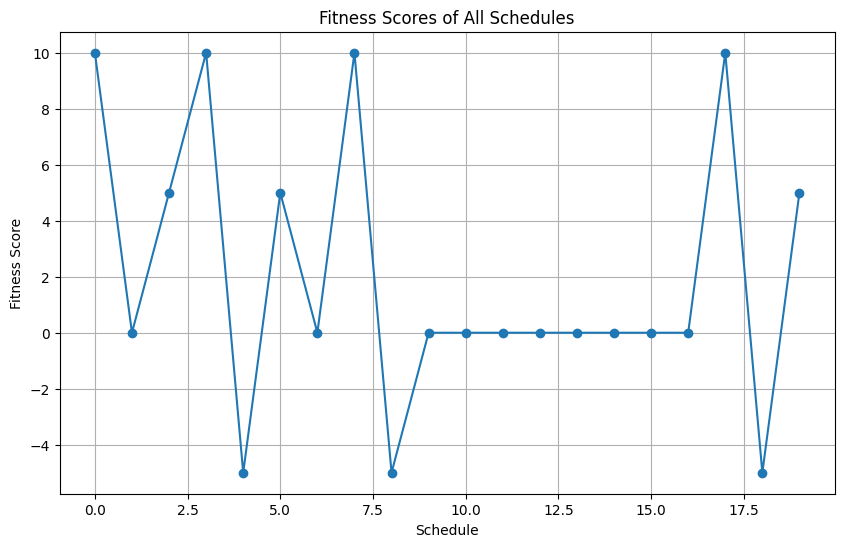

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
best_index = max(range(len(fitness_scores_and_constraints)), key=lambda i: fitness_scores_and_constraints[i][0])

initial_population[]
best_schedule = initial_population[best_index]
best_fitness_score, best_constraints = fitness_scores_and_constraints[best_index][:2]
fitness_scores = [score for score, _, _ in fitness_scores_and_constraints]

# Display the best schedule and its details in a table
best_schedule_df = pd.DataFrame(best_schedule)
best_schedule_df.columns = ['Course Code', 'Duration', 'Classroom', 'Start Time', 'Teacher', 'Students', 'Day']
print("Best Schedule:")

print("Fitness Score:", best_fitness_score)
print("Constraints Satisfied:", best_constraints)

# Visualize fitness scores of all schedules
plt.figure(figsize=(10, 6))
plt.plot(range(len(fitness_scores)), fitness_scores, marker='o', linestyle='-')
plt.xlabel('Schedule')
plt.ylabel('Fitness Score')
plt.title('Fitness Scores of All Schedules')
plt.grid(True)
plt.show()


### **11. Best Selected Schedule Representation**

This section presents the best selected schedule as a table representation.

#### Methodology

1. **Schedule Display Function**:
   - Define a function to convert the selected schedule into a DataFrame and display it as a table.

2. **Example Usage**:
   - Display the best selected schedule using the defined function.

#### Result
The table representation provides a detailed view of the best selected schedule, including course codes, duration, classroom, start time, teacher, students, and day.


In [73]:
import pandas as pd

# Define a function to display the schedule as a table
def display_schedule(schedule):
    # Convert the schedule to a DataFrame
    schedule_df = pd.DataFrame(schedule)
    # Display the DataFrame
    return schedule_df

# Example usage:
df_final = display_schedule(initial_population[best_index])
df_final


,courseCode,duration,classroom,startTime,teacher,students,day
0,CS217,1,A306,11,Maimoona Rassol,"[Dean Brodesky, Mika Tatsumoto, Zaki Choudhury...",Monday
1,EE227,1,B210,9,Ejaz Ahmed,"[Naseem Akram, Rafal Szczypinski, Adam C Ryan,...",Monday
2,CS211,1,C303,13,Zainab Abaid,"[Sagar R Jilka, Maria M Ponce Carpio, Reem N H...",Thursday
3,SE110,1,B105,16,Ameen Chilwan,"[Kamila Keshubay, Irfan Yousaf, Adam C Ryan, M...",Thursday
4,CS118,1,C310,10,Shoaib Mehboob,"[Sam Duncanson, Ana Sbert Ortin, Hassana Begum...",Monday
5,CS219,1,B101,16,Mehreen Alam,"[Ana B Javier Cuetos, Babak Cheraghchi Bashi A...",Friday
6,CS220,1,B210,10,Asif Naeem,"[Sarah R Young, Huda O Ali, Bibi A Khan, Shire...",Friday
7,CS302,1,C308,12,Sanaa Ilyas,"[Yas Khaled, Saleem Abubacker, Hazimah H Hj Ha...",Thursday
8,CY2012,1,A308,10,Ameen Chilwan,"[Yaser A Aljammaz, Yasir M Salih, Leila C Payn...",Thursday
9,CS307,1,A302,9,Sehrish Hassan,"[Leyla Doroudi, Nosheen Maqbool, Aidan P Murph...",Friday
